## Challenge: Validating a linear regression
Validating regression models for prediction
Statistical tests are useful for making sure a model is a good fit to the test data, and that all the features are useful to the model. However, to make sure a model has good predictive validity for new data, it is necessary to assess the performance of the model on new datasets.

The procedure is the same as what you learned in the Naive Bayes lesson – the holdout method and cross-validation method are both available. You've already had experience writing code to run these kinds of validation models for Naive Bayes: now you can try it again with linear regression. In this case, your goal is to achieve a model with a consistent R2 and only statistically significant parameters across multiple samples.

We'll use the property crime model you've been working on with, based on the FBI:UCR data. Since your model formulation to date has used the entire New York State 2013 dataset, you'll need to validate it using some of the other crime datasets available at the FBI:UCR website. Options include other states crime rates in 2013 or crime rates in New York State in other years or a combination of these.

### Iterate
Based on the results of your validation test, create a revised model, and then test both old and new models on a new holdout or set of folds.

Include your model(s) and a brief writeup of the reasoning behind the validation method you chose and the changes you made to submit and review with your mentor.

In [83]:
#importing modules
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import collections
import statsmodels.stats.proportion
import math
import warnings
from sklearn import linear_model
import statsmodels.formula.api as smf

from IPython.display import display
from scipy.stats import mstats
import statsmodels.api as sm

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
#Testing Data Set(California)
df_offense_ca = pd.read_excel('C:/Users/catan/Downloads/table_8_offenses_known_to_law_enforcement_california_by_city_2013.xls')
df_offense_ca

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,CALIFORNIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson
4,Adelanto,31165,198,2,NaN,15,52,129,886,381,372,133,17
5,Agoura Hills,20762,19,0,NaN,2,10,7,306,109,185,12,7
6,Alameda,76206,158,0,NaN,10,85,63,1902,287,1285,330,17
7,Albany,19104,29,0,NaN,1,24,4,557,94,388,75,7
8,Alhambra,84710,163,1,NaN,9,81,72,1774,344,1196,234,7
9,Aliso Viejo,50005,25,0,NaN,2,4,19,315,71,224,20,3


In [3]:
#Training data set(New York)
df_offense_ny = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
df_offense_ny

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN


In [4]:
df_offense_ny.shape

(355, 13)

In [5]:
df_offense_ny.columns = ['city', 'pop', 'violent_crime',
       'murder',
       'rape_1', 'rape_2',
       'robbery', 'agg_assault', 'property_crime', 'burglary',
       'larceny_theft', 'mot_veh_theft', 'arson']

In [6]:
df_offense_ny.head()

,city,pop,violent_crime,murder,rape_1,rape_2,robbery,agg_assault,property_crime,burglary,larceny_theft,mot_veh_theft,arson
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0


In [7]:
#column rape_1 is mostly empty, we delete it
df_offense_ny = df_offense_ny.drop(['rape_1'], axis=1)

In [8]:
df_offense_ny = df_offense_ny.drop(0)
df_offense_ny = df_offense_ny.drop(1)
df_offense_ny = df_offense_ny.drop(2)
df_offense_ny = df_offense_ny.drop(3)
df_offense_ny = df_offense_ny[:-3]

In [9]:
#convert some object to integers or float
for i in range(0, len(df_offense_ny.columns)):
    df_offense_ny.iloc[:, i] = pd.to_numeric(df_offense_ny.iloc[:, i], errors= 'ignore')

In [10]:
df_offense_ny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 4 to 351
Data columns (total 12 columns):
city              348 non-null object
pop               348 non-null int64
violent_crime     348 non-null int64
murder            348 non-null int64
rape_2            348 non-null int64
robbery           348 non-null int64
agg_assault       348 non-null int64
property_crime    348 non-null int64
burglary          348 non-null int64
larceny_theft     348 non-null int64
mot_veh_theft     348 non-null int64
arson             187 non-null float64
dtypes: float64(1), int64(10), object(1)
memory usage: 35.3+ KB


In [11]:
df_offense_ny['arson'].fillna((df_offense_ny['arson'].mean()), inplace=True)

In [12]:
df_offense_ny['arson'] = df_offense_ny['arson'].apply(np.int64)

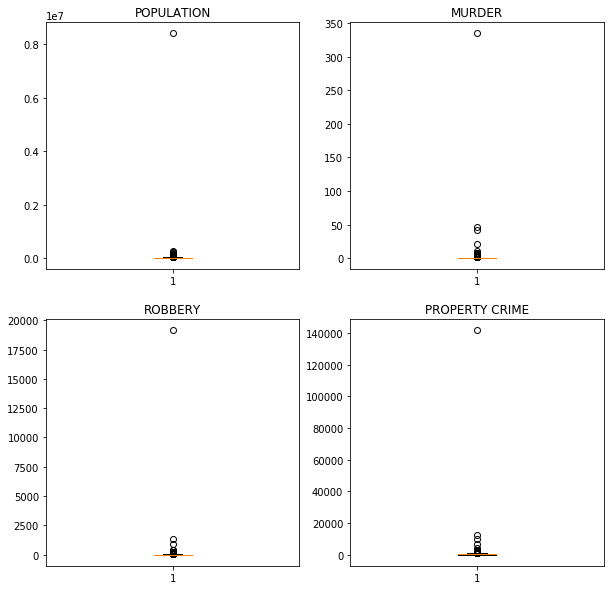

In [13]:
# inspect each column to see if there is any potential outlier
plt.subplots(figsize=(10,10))

plt.subplot(2,2,1)
plt.boxplot(df_offense_ny['pop'])
plt.title('POPULATION')

plt.subplot(2,2,2)
plt.boxplot(df_offense_ny['murder'])
plt.title('MURDER')

plt.subplot(2,2,3)
plt.boxplot(df_offense_ny['robbery'])
plt.title('ROBBERY')

plt.subplot(2,2,4)
plt.boxplot(df_offense_ny['property_crime'])
plt.title('PROPERTY CRIME')


plt.show()

In [14]:
df_clean_ny = df_offense_ny[df_offense_ny['pop']<7000000]
df_clean_ny = df_offense_ny[df_offense_ny['murder']<150]
df_clean_ny = df_offense_ny[df_offense_ny['robbery']<2500]
df_clean_ny = df_offense_ny[df_offense_ny['property_crime']<20000]



In [15]:
df_clean_ny['pop_sqr'] = df_clean_ny['pop']**2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
def funct(x):
    if x ==0:
        return int('0')
    elif x > 0:
        return int('1')



In [17]:
df_clean_ny['robbery_cat'] = df_clean_ny['robbery'].apply(funct)
df_clean_ny['murder_cat'] = df_clean_ny['murder'].apply(funct)
df_clean_ny['burglary_cat'] = df_clean_ny['murder'].apply(funct)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [18]:
#reseting the index
df_clean_ny = df_clean_ny.reset_index(drop=True)

In [19]:
df_cat_ny = df_clean_ny[['pop', 'pop_sqr', 'murder_cat', 'robbery_cat','property_crime']]

In [20]:
df_notcat_ny = df_clean_ny[['pop', 'pop_sqr', 'murder', 'robbery','property_crime']]

In [21]:
df_cat_ny.head() 

,pop,pop_sqr,murder_cat,robbery_cat,property_crime
0,1861,3463321,0,0,12
1,2577,6640929,0,0,24
2,2846,8099716,0,0,16
3,97956,9595377936,1,1,4090
4,6388,40806544,0,1,223


In [22]:
df_notcat_ny.head() 

,pop,pop_sqr,murder,robbery,property_crime
0,1861,3463321,0,0,12
1,2577,6640929,0,0,24
2,2846,8099716,0,0,16
3,97956,9595377936,8,227,4090
4,6388,40806544,0,4,223


### Use df_cat_ny

In [23]:
regr = linear_model.LinearRegression()
Y = df_cat_ny['property_crime'].values.reshape(-1, 1)
X = df_cat_ny[['pop', 'pop_sqr', 'murder_cat', 'robbery_cat']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: ')
print(regr.score(X, Y))


Coefficients: 
 [[1.29510871e-02 1.14920528e-07 1.95038666e+02 9.28205845e+01]]

Intercept: 
 [-16.81586632]

R-squared: 
0.8444937611173492


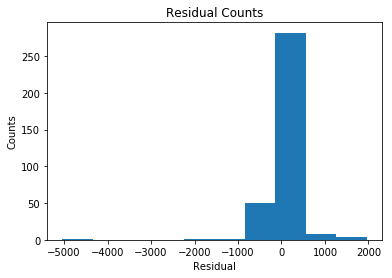

In [24]:
predicted = regr.predict(X).ravel()
actual = df_cat_ny['property_crime']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Counts')
plt.show()

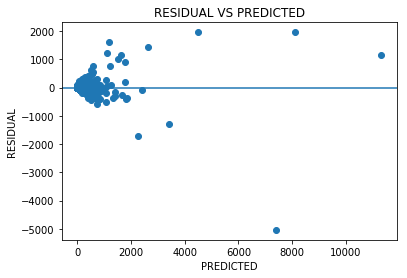

In [25]:
plt.scatter(predicted, residual)
plt.xlabel('PREDICTED')
plt.ylabel('RESIDUAL')
plt.axhline(y=0)
plt.title('RESIDUAL VS PREDICTED')
plt.show()

### Use df_notcat_ny

In [26]:
regr = linear_model.LinearRegression()
Y = df_notcat_ny['property_crime'].values.reshape(-1, 1)
X = df_notcat_ny[['pop', 'pop_sqr', 'murder', 'robbery']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: ')
print(regr.score(X, Y))


Coefficients: 
 [[ 2.05519792e-02 -7.19468320e-08  1.02643383e+02  5.13001360e+00]]

Intercept: 
 [-25.0398582]

R-squared: 
0.939283140822447


In [27]:
# check the p-value of each coefficient
linear_formula = 'property_crime ~ pop + pop_sqr + murder + robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df_notcat_ny).fit()

print('\nPARAMETERS: \n', lm.params)
print('\nP_VALUES: \n', lm.pvalues)
print('\nR_SQUARED: \n', lm.rsquared)


PARAMETERS: 
 Intercept   -25.040
pop           0.021
pop_sqr      -0.000
murder      102.643
robbery       5.130
dtype: float64

P_VALUES: 
 Intercept   0.186
pop         0.000
pop_sqr     0.000
murder      0.000
robbery     0.000
dtype: float64

R_SQUARED: 
 0.9392831408224471


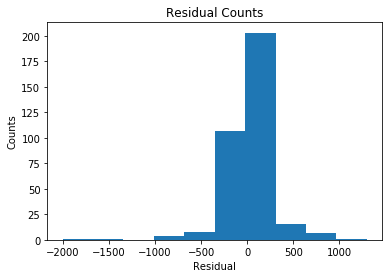

In [28]:
predicted = regr.predict(X).ravel()
actual = df_notcat_ny['property_crime']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Counts')
plt.show()

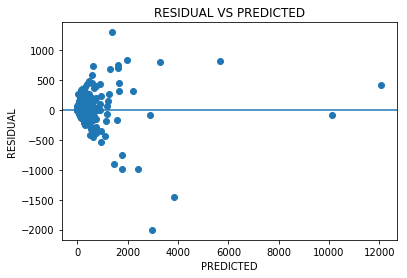

In [29]:
plt.scatter(predicted, residual)
plt.xlabel('PREDICTED')
plt.ylabel('RESIDUAL')
plt.axhline(y=0)
plt.title('RESIDUAL VS PREDICTED')
plt.show()

In [30]:
#Use this one R-squared= 94%
df_notcat_ny.head() 

,pop,pop_sqr,murder,robbery,property_crime
0,1861,3463321,0,0,12
1,2577,6640929,0,0,24
2,2846,8099716,0,0,16
3,97956,9595377936,8,227,4090
4,6388,40806544,0,4,223


# Repeat the data processing with the testing dataset
## Crime in California

In [31]:
#Testing Data Set
df_offense_ca = pd.read_excel('C:/Users/catan/Downloads/table_8_offenses_known_to_law_enforcement_california_by_city_2013.xls')
df_offense_ca

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,CALIFORNIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson
4,Adelanto,31165,198,2,NaN,15,52,129,886,381,372,133,17
5,Agoura Hills,20762,19,0,NaN,2,10,7,306,109,185,12,7
6,Alameda,76206,158,0,NaN,10,85,63,1902,287,1285,330,17
7,Albany,19104,29,0,NaN,1,24,4,557,94,388,75,7
8,Alhambra,84710,163,1,NaN,9,81,72,1774,344,1196,234,7
9,Aliso Viejo,50005,25,0,NaN,2,4,19,315,71,224,20,3


In [32]:
df_offense_ca.shape

(468, 13)

In [33]:
df_offense_ca.index

RangeIndex(start=0, stop=468, step=1)

In [34]:
df_offense_ca.loc[3,:]

Table 8                                          City
Unnamed: 1                                 Population
Unnamed: 2                             Violent\ncrime
Unnamed: 3     Murder and\nnonnegligent\nmanslaughter
Unnamed: 4               Rape\n(revised\ndefinition)1
Unnamed: 5                Rape\n(legacy\ndefinition)2
Unnamed: 6                                    Robbery
Unnamed: 7                        Aggravated\nassault
Unnamed: 8                            Property\ncrime
Unnamed: 9                                   Burglary
Unnamed: 10                           Larceny-\ntheft
Unnamed: 11                     Motor\nvehicle\ntheft
Unnamed: 12                                     Arson
Name: 3, dtype: object

In [35]:
list(df_offense_ca.loc[3,:])

['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(revised\ndefinition)1',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson']

In [36]:
df_offense_ca.columns = ['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(revised\ndefinition)1',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson']

In [37]:
df_offense_ca.columns = ['city', 'pop', 'violent_crime',
       'murder',
       'rape_1', 'rape_2',
       'robbery', 'agg_assault', 'property_crime', 'burglary',
       'larceny_theft', 'mot_veh_theft', 'arson']

In [38]:
#column rape_1 is mostly empty, we delete it
df_offense_ca = df_offense_ca.drop(['rape_1'], axis=1)


In [39]:
df_offense_ca = df_offense_ca.drop(0)
df_offense_ca = df_offense_ca.drop(1)
df_offense_ca = df_offense_ca.drop(2)
df_offense_ca = df_offense_ca.drop(3)
df_offense_ca = df_offense_ca[:-2]

In [40]:
#convert some object to integers or float
for i in range(0, len(df_offense_ca.columns)):
    df_offense_ca.iloc[:, i] = pd.to_numeric(df_offense_ca.iloc[:, i], errors= 'ignore')


In [41]:
df_offense_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 4 to 465
Data columns (total 12 columns):
city              462 non-null object
pop               462 non-null int64
violent_crime     462 non-null int64
murder            462 non-null int64
rape_2            462 non-null int64
robbery           462 non-null int64
agg_assault       462 non-null int64
property_crime    462 non-null int64
burglary          462 non-null int64
larceny_theft     462 non-null int64
mot_veh_theft     462 non-null int64
arson             462 non-null int64
dtypes: int64(11), object(1)
memory usage: 46.9+ KB


In [42]:
df_offense_ca.fillna((df_offense_ca.mean()), inplace=True)

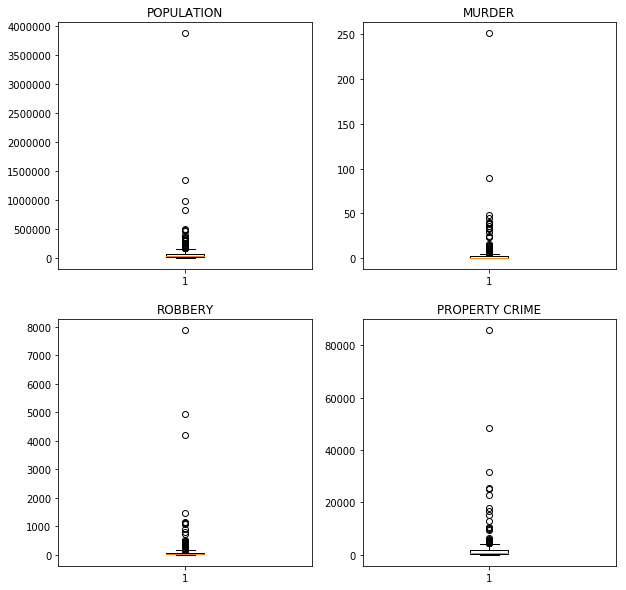

In [43]:
# inspect each column to see if there is any potential outlier
plt.subplots(figsize=(10,10))

plt.subplot(2,2,1)
plt.boxplot(df_offense_ca['pop'])
plt.title('POPULATION')

plt.subplot(2,2,2)
plt.boxplot(df_offense_ca['murder'])
plt.title('MURDER')

plt.subplot(2,2,3)
plt.boxplot(df_offense_ca['robbery'])
plt.title('ROBBERY')

plt.subplot(2,2,4)
plt.boxplot(df_offense_ca['property_crime'])
plt.title('PROPERTY CRIME')


plt.show()

In [44]:
df_clean_ca = df_offense_ca[df_offense_ca['pop']<500000]
df_clean_ca = df_offense_ca[df_offense_ca['murder']<70]
df_clean_ca = df_offense_ca[df_offense_ca['robbery']<2000]
df_clean_ca = df_offense_ca[df_offense_ca['property_crime']<20000]

In [71]:
df_clean_ca['pop_sqr'] = df_offense_ca['pop']**2

In [46]:
def funct(x):
    if x ==0:
        return int('0')
    elif x > 0:
        return int('1')



In [68]:
df_clean_ca['robbery_cat'] = df_clean_ca['robbery'].apply(funct)

In [69]:
df_clean_ca['murder_cat'] = df_clean_ca['murder'].apply(funct)

In [70]:
df_clean_ca['burglary_cat'] = df_clean_ca['murder'].apply(funct)

In [50]:
#reseting the index
df_clean_ca = df_clean_ca.reset_index(drop=True)

In [51]:
df_clean_ca.head()

,city,pop,violent_crime,murder,rape_2,robbery,agg_assault,property_crime,burglary,larceny_theft,mot_veh_theft,arson,pop_sqr,robbery_cat,murder_cat,burglary_cat
0,Adelanto,31165,198,2,15,52,129,886,381,372,133,17,971257225,1,1,1
1,Agoura Hills,20762,19,0,2,10,7,306,109,185,12,7,431060644,1,0,0
2,Alameda,76206,158,0,10,85,63,1902,287,1285,330,17,5807354436,1,0,0
3,Albany,19104,29,0,1,24,4,557,94,388,75,7,364962816,1,0,0
4,Alhambra,84710,163,1,9,81,72,1774,344,1196,234,7,7175784100,1,1,1


In [52]:
df_clean_ca.shape

(456, 16)

In [53]:
df_cat_ca = df_clean_ca[['pop', 'pop_sqr', 'murder_cat', 'robbery_cat','burglary_cat','property_crime']]

In [72]:
# add double_crime
df_cat_ca['double_crime'] = np.where((df_cat_ca['murder_cat'] == 1) & 
                                              (df_cat_ca['robbery_cat'] == 1),
                                              2, 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [55]:
df_cat_ca 

,pop,pop_sqr,murder_cat,robbery_cat,burglary_cat,property_crime,double_crime
0,31165,971257225,1,1,1,886,2
1,20762,431060644,0,1,0,306,0
2,76206,5807354436,0,1,0,1902,0
3,19104,364962816,0,1,0,557,0
4,84710,7175784100,1,1,1,1774,2
5,50005,2500500025,0,1,0,315,0
6,2681,7187761,1,1,1,71,2
7,20068,402724624,0,1,0,510,0
8,345320,119245902400,1,1,1,9611,2
9,10098,101969604,0,1,0,721,0


In [56]:
df_notcat_ca = df_clean_ca[['pop', 'pop_sqr', 'murder', 'robbery','property_crime']]

In [57]:
#Use this R-squared= 94% df_notcat_ny
regr = linear_model.LinearRegression()
Y_ca = df_notcat_ca['property_crime'].values.reshape(-1, 1)
X_ca = df_notcat_ca[['pop', 'pop_sqr', 'murder', 'robbery']]
regr.fit(X_ca, Y_ca)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: ')
print(regr.score(X_ca, Y_ca))


Coefficients: 
 [[ 1.62016017e-02 -3.92455826e-09 -2.27691153e+01  9.33864560e+00]]

Intercept: 
 [46.04715477]

R-squared: 
0.923391996613826


In [58]:
# check the p-value of each coefficient
linear_formula = 'property_crime ~ pop + pop_sqr + murder + robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df_notcat_ca).fit()

print('\nPARAMETERS: \n', lm.params)
print('\nP_VALUES: \n', lm.pvalues)
print('\nR_SQUARED: \n', lm.rsquared)


PARAMETERS: 
 Intercept    46.047
pop           0.016
pop_sqr      -0.000
murder      -22.769
robbery       9.339
dtype: float64

P_VALUES: 
 Intercept   0.266
pop         0.000
pop_sqr     0.211
murder      0.036
robbery     0.000
dtype: float64

R_SQUARED: 
 0.923391996613826


#### From the p-values, we see the p-value for pop_sqr is greater than .05, suggesting that there is probably no effect for that feature – and that dropping it would not adversely affect the  𝑅2 .


In [59]:
# Let us drop pop_sqr

In [60]:
# check the p-value of each coefficient
linear_formula = 'property_crime ~ pop + murder + robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df_notcat_ca).fit()

print('\nPARAMETERS: \n', lm.params)
print('\nP_VALUES: \n', lm.pvalues)
print('\nR_SQUARED: \n', lm.rsquared)


PARAMETERS: 
 Intercept    72.560
pop           0.015
murder      -20.297
robbery       9.027
dtype: float64

P_VALUES: 
 Intercept   0.042
pop         0.000
murder      0.058
robbery     0.000
dtype: float64

R_SQUARED: 
 0.9231251990015877


## Use Categorized

In [61]:
#Use Categorized
regr = linear_model.LinearRegression()
Y_ca = df_cat_ca['property_crime'].values.reshape(-1, 1)
X_ca = df_cat_ca[['pop', 'pop_sqr', 'murder_cat', 'robbery_cat']]
regr.fit(X_ca, Y_ca)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: ')
print(regr.score(X, Y))


Coefficients: 
 [[2.00371097e-02 2.91676365e-08 2.90019738e+02 5.36394037e+01]]

Intercept: 
 [-30.99248387]

R-squared: 
-31.034054963778964


In [62]:
#above is low R-squared

In [65]:
#Add more categorize w/ burglary_cat
#Use Categorized
regr = linear_model.LinearRegression()
Y_ca = df_cat_ca['property_crime'].values.reshape(-1, 1)
X_ca = df_cat_ca[['pop', 'pop_sqr', 'murder_cat', 'robbery_cat','burglary_cat']]
regr.fit(X_ca, Y_ca)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: ')
print(regr.score(X_ca, Y_ca))


Coefficients: 
 [[2.00371097e-02 2.91676365e-08 1.45009869e+02 5.36394037e+01
  1.45009869e+02]]

Intercept: 
 [-30.99248389]

R-squared: 
0.8511913593487226


In [64]:
# check the p-value of each coefficient
linear_formula = 'property_crime ~ pop + pop_sqr + murder_cat + robbery_cat + burglary_cat'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df_cat_ca).fit()

print('\nPARAMETERS: \n', lm.params)
print('\nP_VALUES: \n', lm.pvalues)
print('\nR_SQUARED: \n', lm.rsquared)


PARAMETERS: 
 Intercept      -30.992
pop              0.020
pop_sqr          0.000
murder_cat     145.010
robbery_cat     53.639
burglary_cat   145.010
dtype: float64

P_VALUES: 
 Intercept      0.814
pop            0.000
pop_sqr        0.000
murder_cat     0.001
robbery_cat    0.712
burglary_cat   0.001
dtype: float64

R_SQUARED: 
 0.8511913593487226


From the p-values, we see the p-value for robbery_cat is greater than .05, suggesting that there is probably no effect for that feature – and that dropping it would not adversely affect the 𝑅2 .

Let us drop column robbery_cat

In [66]:
# check the p-value of each coefficient
linear_formula = 'property_crime ~ pop + pop_sqr + burglary_cat'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df_cat_ca).fit()

print('\nPARAMETERS: \n', lm.params)
print('\nP_VALUES: \n', lm.pvalues)
print('\nR_SQUARED: \n', lm.rsquared)


PARAMETERS: 
 Intercept       12.593
pop              0.020
pop_sqr          0.000
burglary_cat   294.310
dtype: float64

P_VALUES: 
 Intercept      0.831
pop            0.000
pop_sqr        0.000
burglary_cat   0.001
dtype: float64

R_SQUARED: 
 0.851146328333059


In [67]:
# check the p-value of each coefficient
linear_formula = 'property_crime ~ pop + pop_sqr + murder_cat + burglary_cat + double_crime'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df_cat_ca).fit()

print('\nPARAMETERS: \n', lm.params)
print('\nP_VALUES: \n', lm.pvalues)
print('\nR_SQUARED: \n', lm.rsquared)


PARAMETERS: 
 Intercept      12.593
pop             0.020
pop_sqr         0.000
murder_cat     49.052
burglary_cat   49.052
double_crime   98.103
dtype: float64

P_VALUES: 
 Intercept      0.831
pop            0.000
pop_sqr        0.000
murder_cat     0.001
burglary_cat   0.001
double_crime   0.001
dtype: float64

R_SQUARED: 
 0.851146328333059


In [77]:
data_ca = df_cat_ca[['pop'] + ['pop_sqr'] + ['murder_cat'] + ['burglary_cat'] + ['double_crime']]
target_ca = df_cat_ca['property_crime']

In [88]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data_ca, target_ca, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(data_ca, target_ca).score(data_ca, target_ca)))

With 20% Holdout: 0.8016436771078487
Testing on Sample: 0.851146328333059


In [81]:
X_train, X_test, y_train, y_test = train_test_split(data_ca, 
                                                    target_ca, 
                                                    test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_train.shape, y_test.shape)

(364, 5) (364,)
(364, 5) (92,)


In [87]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X_train, y_train, cv=10)

array([0.92065025, 0.46328486, 0.85169949, 0.71070664, 0.90580742,
       0.86633501, 0.67312058, 0.67150883, 0.77969258, 0.81337497])

In [ ]:
# check the p-value of each coefficient
linear_formula = 'property_crime ~ pop + pop_sqr + murder_cat + burglary_cat + double_crime'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df_cat_ca).fit()

print('\nPARAMETERS: \n', lm.params)
print('\nP_VALUES: \n', lm.pvalues)
print('\nR_SQUARED: \n', lm.rsquared)

In [ ]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X_ca, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [89]:
df_cat_ca.head()

,pop,pop_sqr,murder_cat,robbery_cat,burglary_cat,property_crime,double_crime
0,31165,971257225,1,1,1,886,2
1,20762,431060644,0,1,0,306,0
2,76206,5807354436,0,1,0,1902,0
3,19104,364962816,0,1,0,557,0
4,84710,7175784100,1,1,1,1774,2


In [91]:
#Add more categorize w/ burglary_cat
#Use Categorized
regr = linear_model.LinearRegression()
Y_ca = df_cat_ca['property_crime'].values.reshape(-1, 1)
X_ca = df_cat_ca[['pop', 'pop_sqr', 'murder_cat', 'robbery_cat','burglary_cat','double_crime']]
regr.fit(X_ca, Y_ca)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: ')
print(regr.score(X_ca, Y_ca))


Coefficients: 
 [[2.00371097e-02 2.91676365e-08 4.83366230e+01 5.36394037e+01
  4.83366230e+01 9.66732460e+01]]

Intercept: 
 [-30.99248385]

R-squared: 
0.8511913593487226
